In [ ]:
import pandas as pd

df = pd.read_json(
    "yelp_academic_dataset_review.json",
# Dataset: Yelp Open Dataset (reviews)
# Source: Kaggle
    lines = True,
    nrows = 200000
)[["text","stars","date"]]


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   text    200000 non-null  object        
 1   stars   200000 non-null  int64         
 2   date    200000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6+ MB


In [4]:
df = df[['text','stars','date']]

In [5]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df['clean_text'] = df['text'].apply(clean_text)

In [6]:
def label_sentiment(stars):
    if stars <= 2:
        return 0
    elif stars == 3:
        return 1
    else:
        return 2
df['label'] = df['stars'].apply(label_sentiment)


In [7]:
df[['clean_text', 'stars']].to_csv(
    "yelp_preprocessed.csv",
    index=False
)


<function matplotlib.pyplot.show(close=None, block=None)>

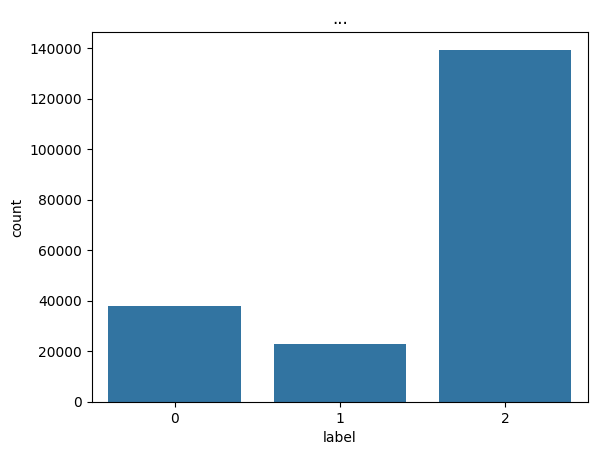

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("...")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

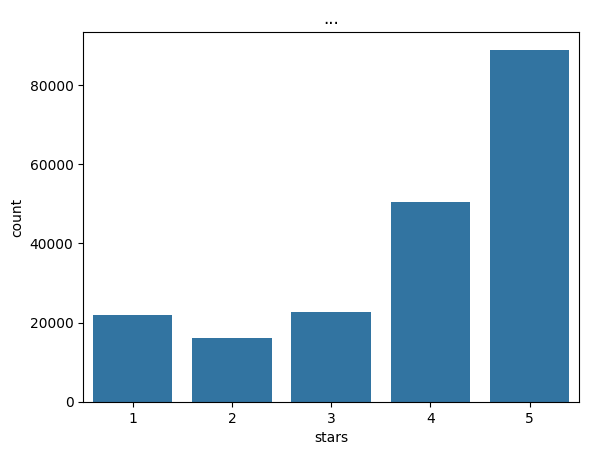

In [9]:
sns.countplot(x='stars', data=df)
plt.title("...")
plt.show

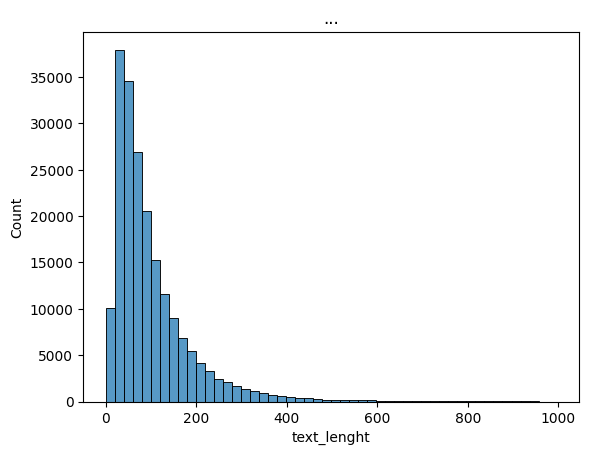

In [10]:
df['text_lenght'] = df['clean_text'].apply(lambda x: len(x.split()))

sns.histplot(df['text_lenght'], bins=50)
plt.title("...")
plt.show()

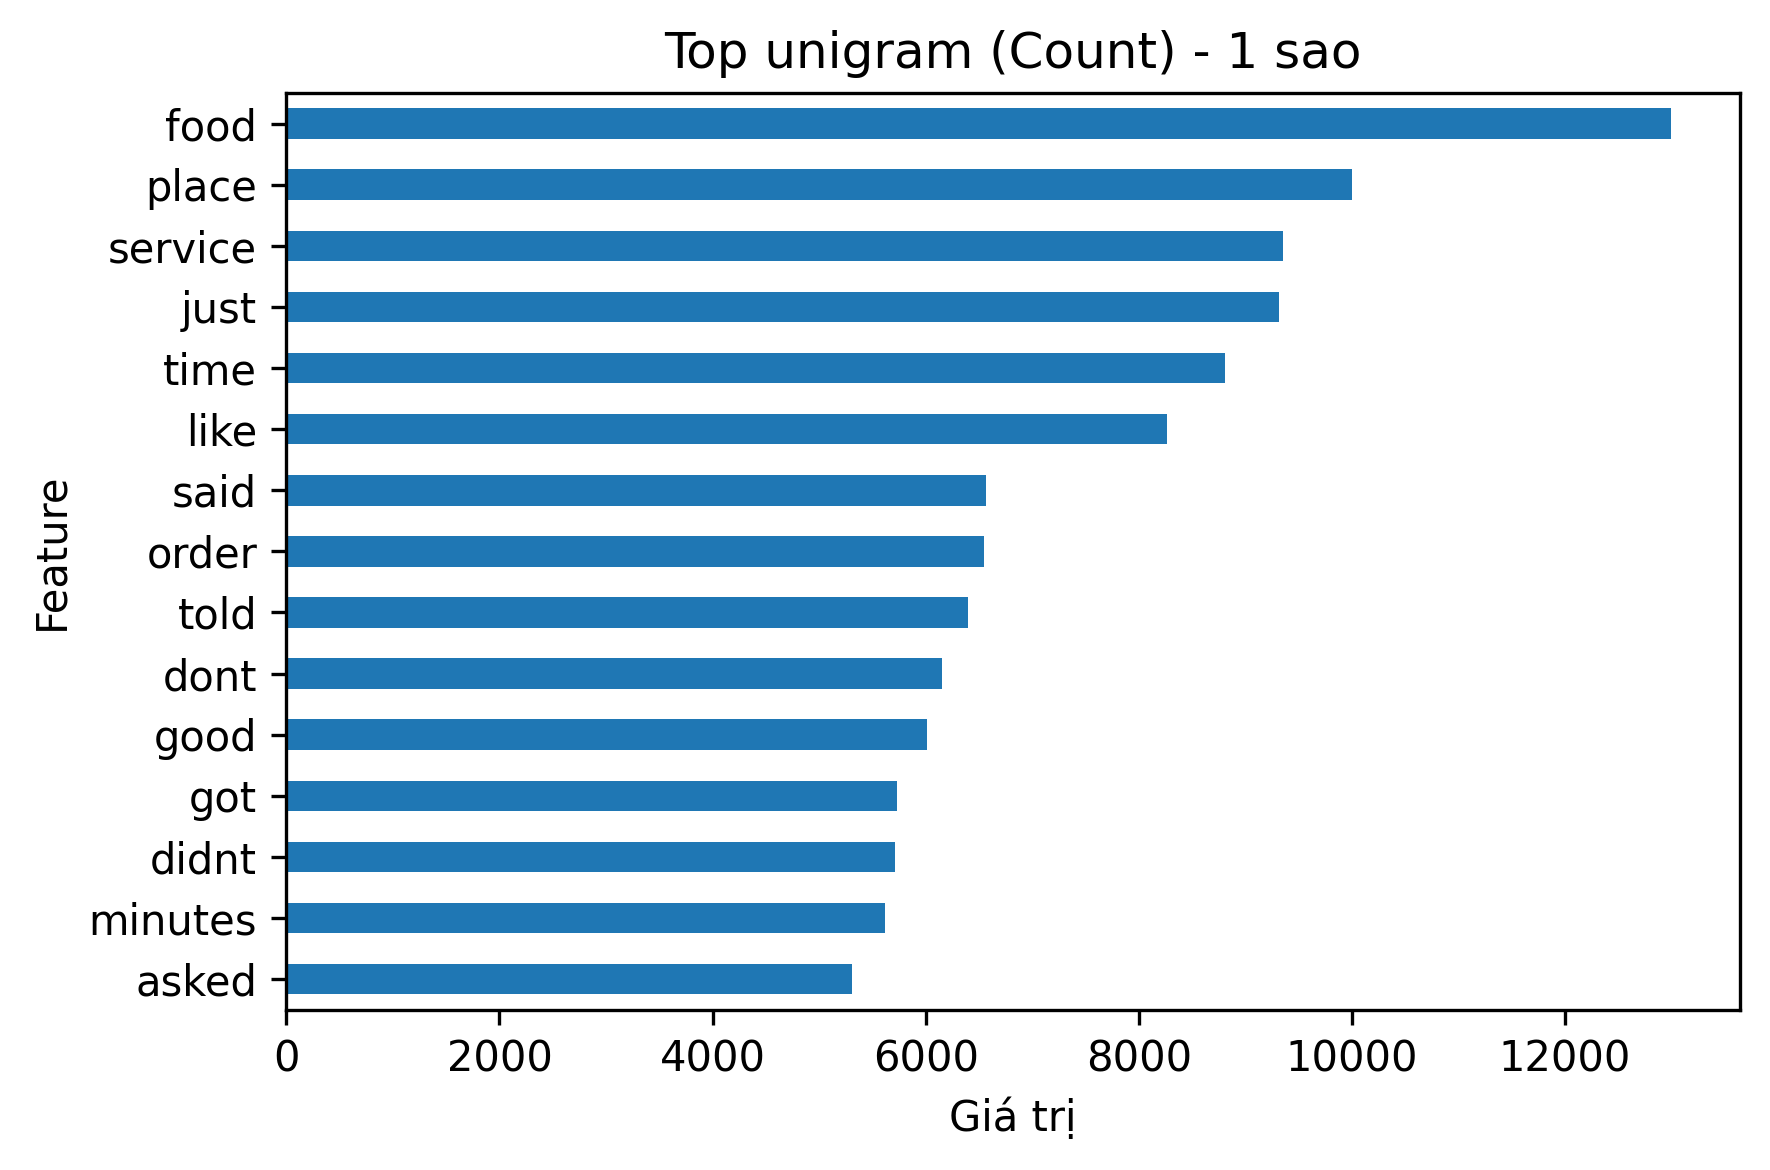

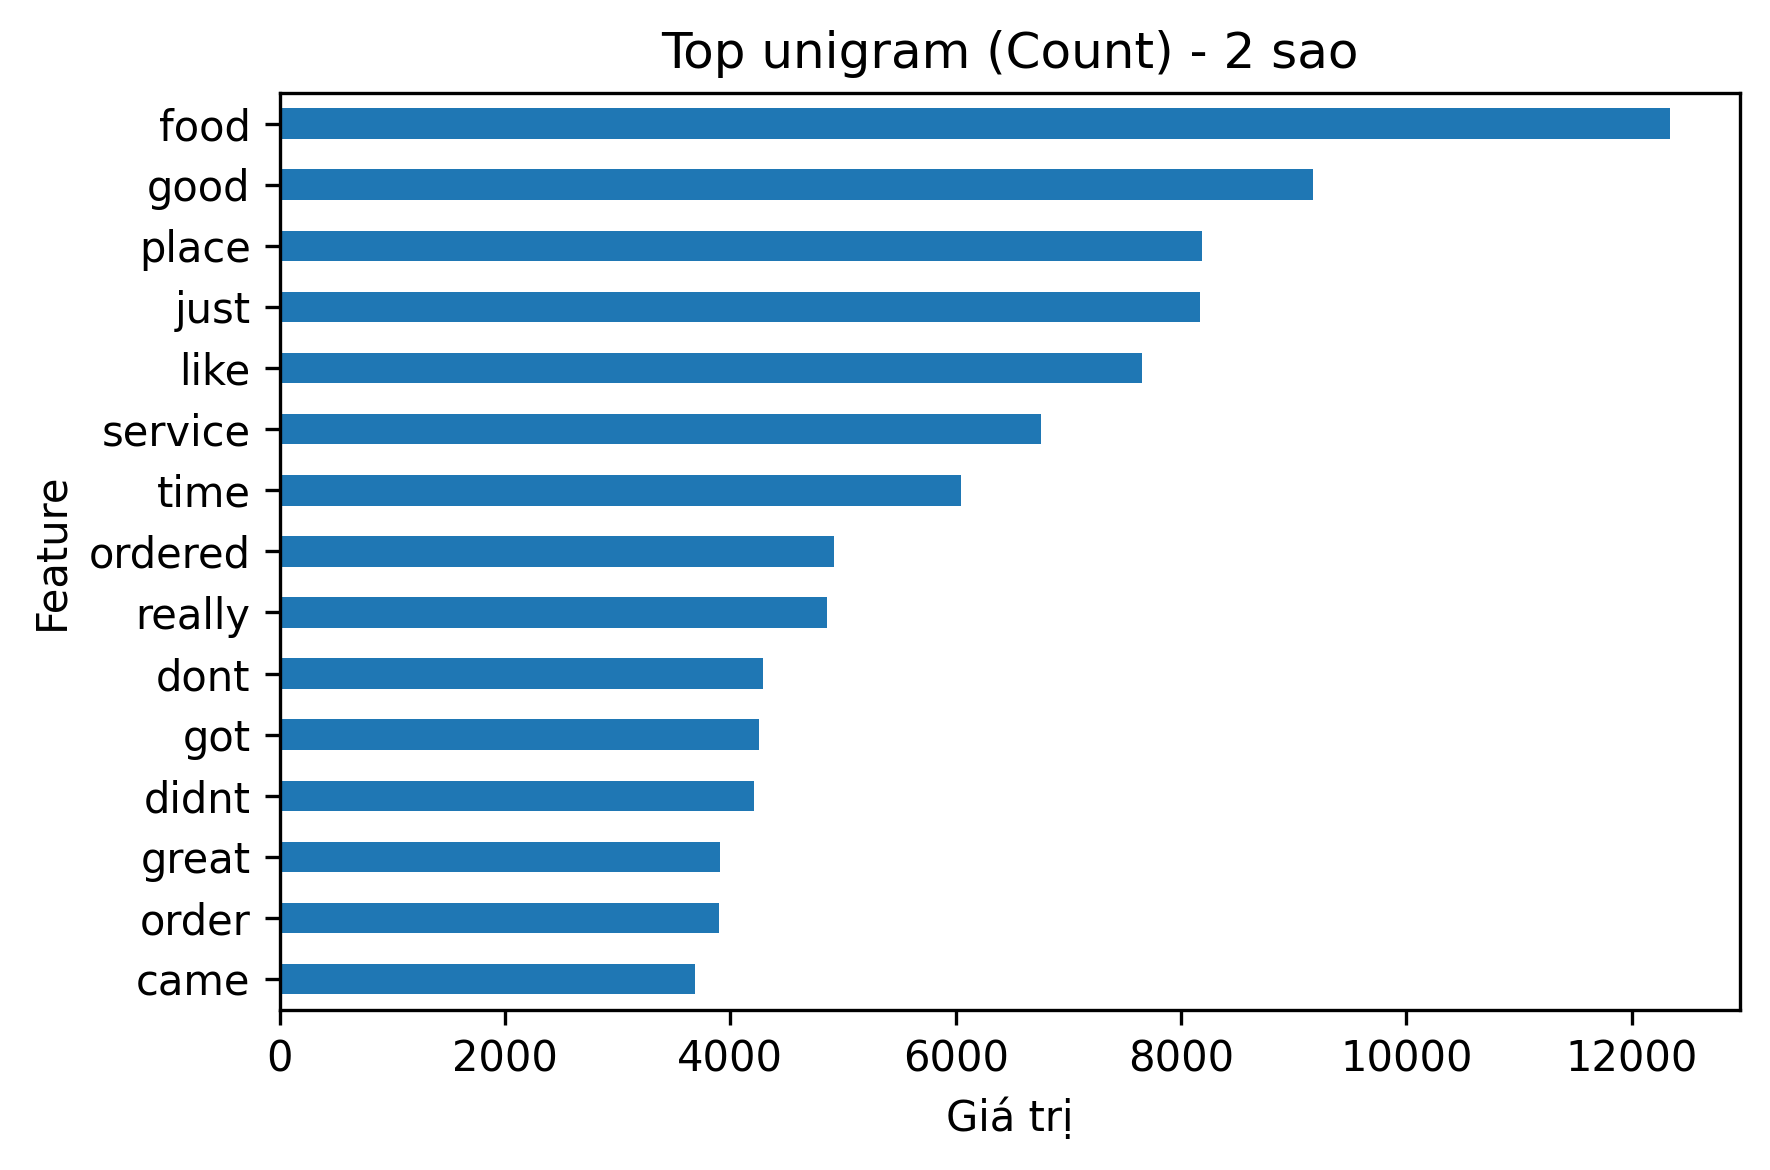

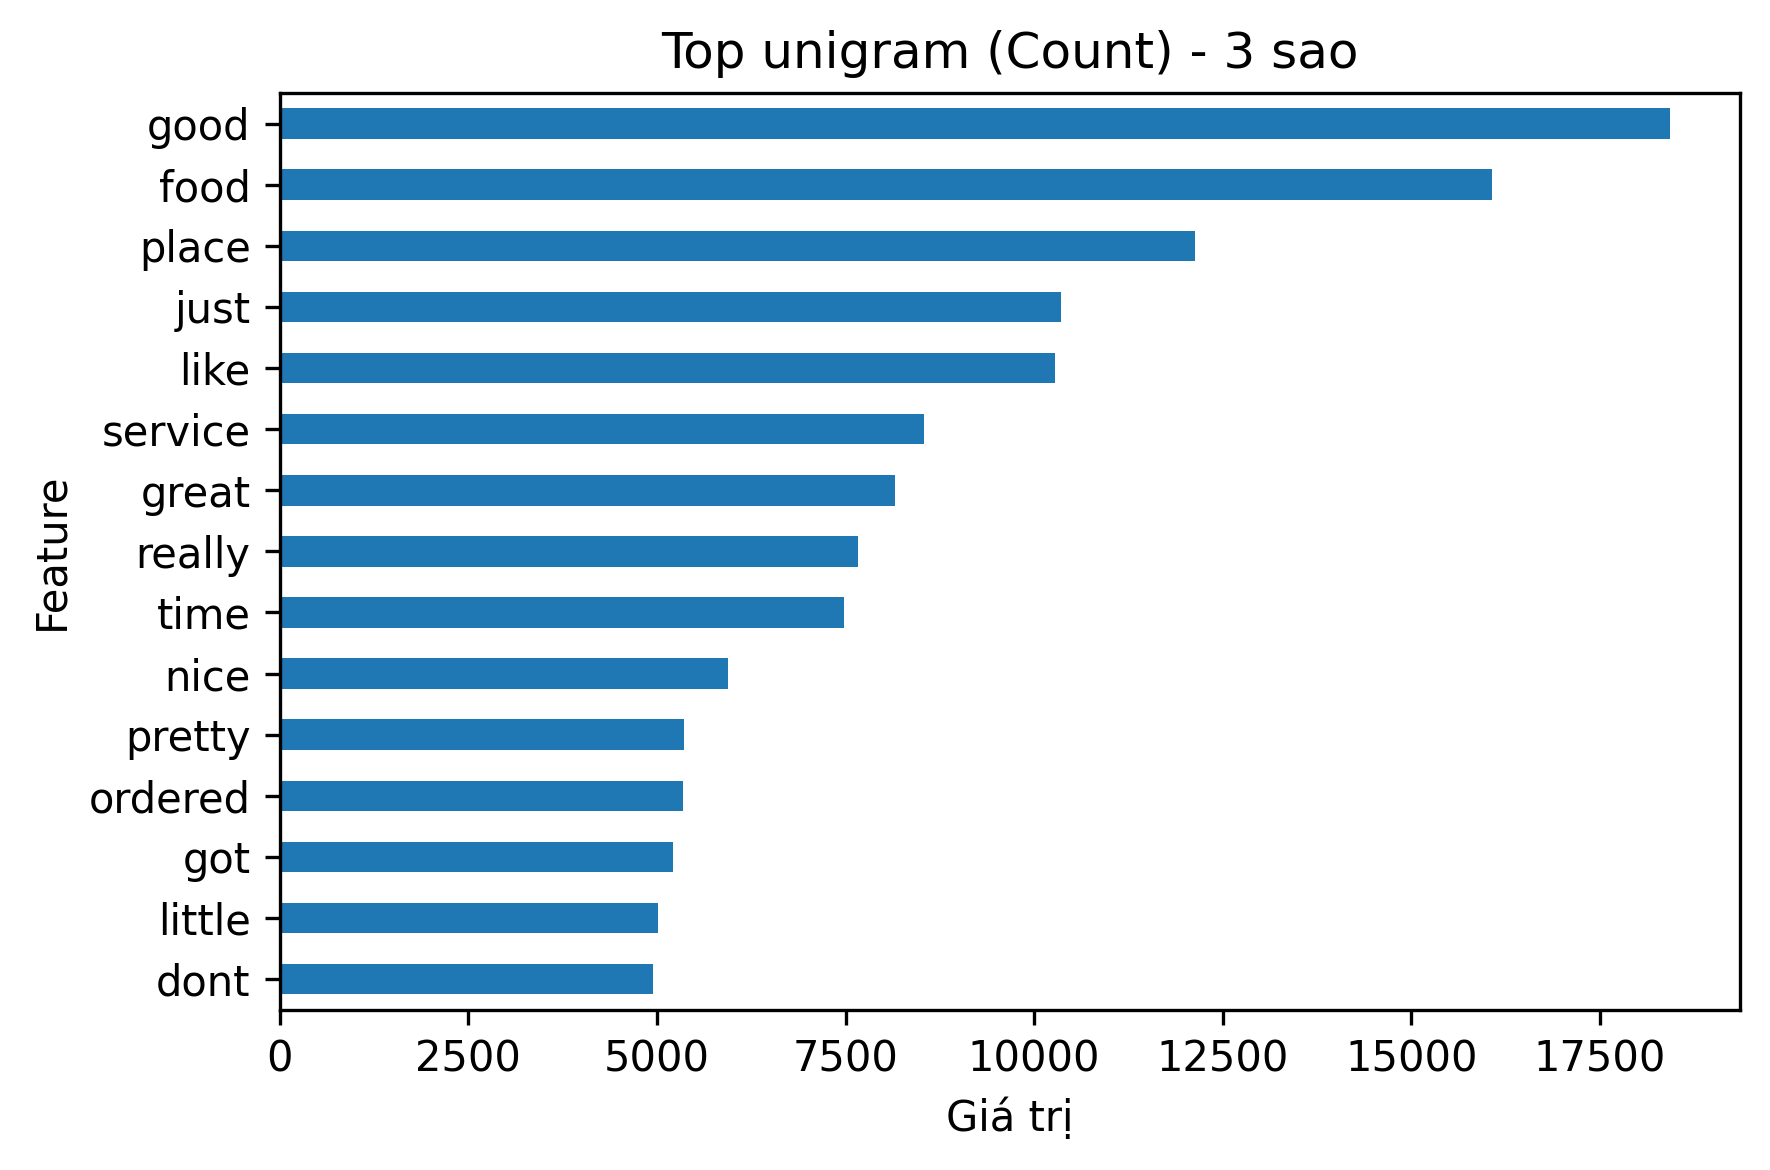

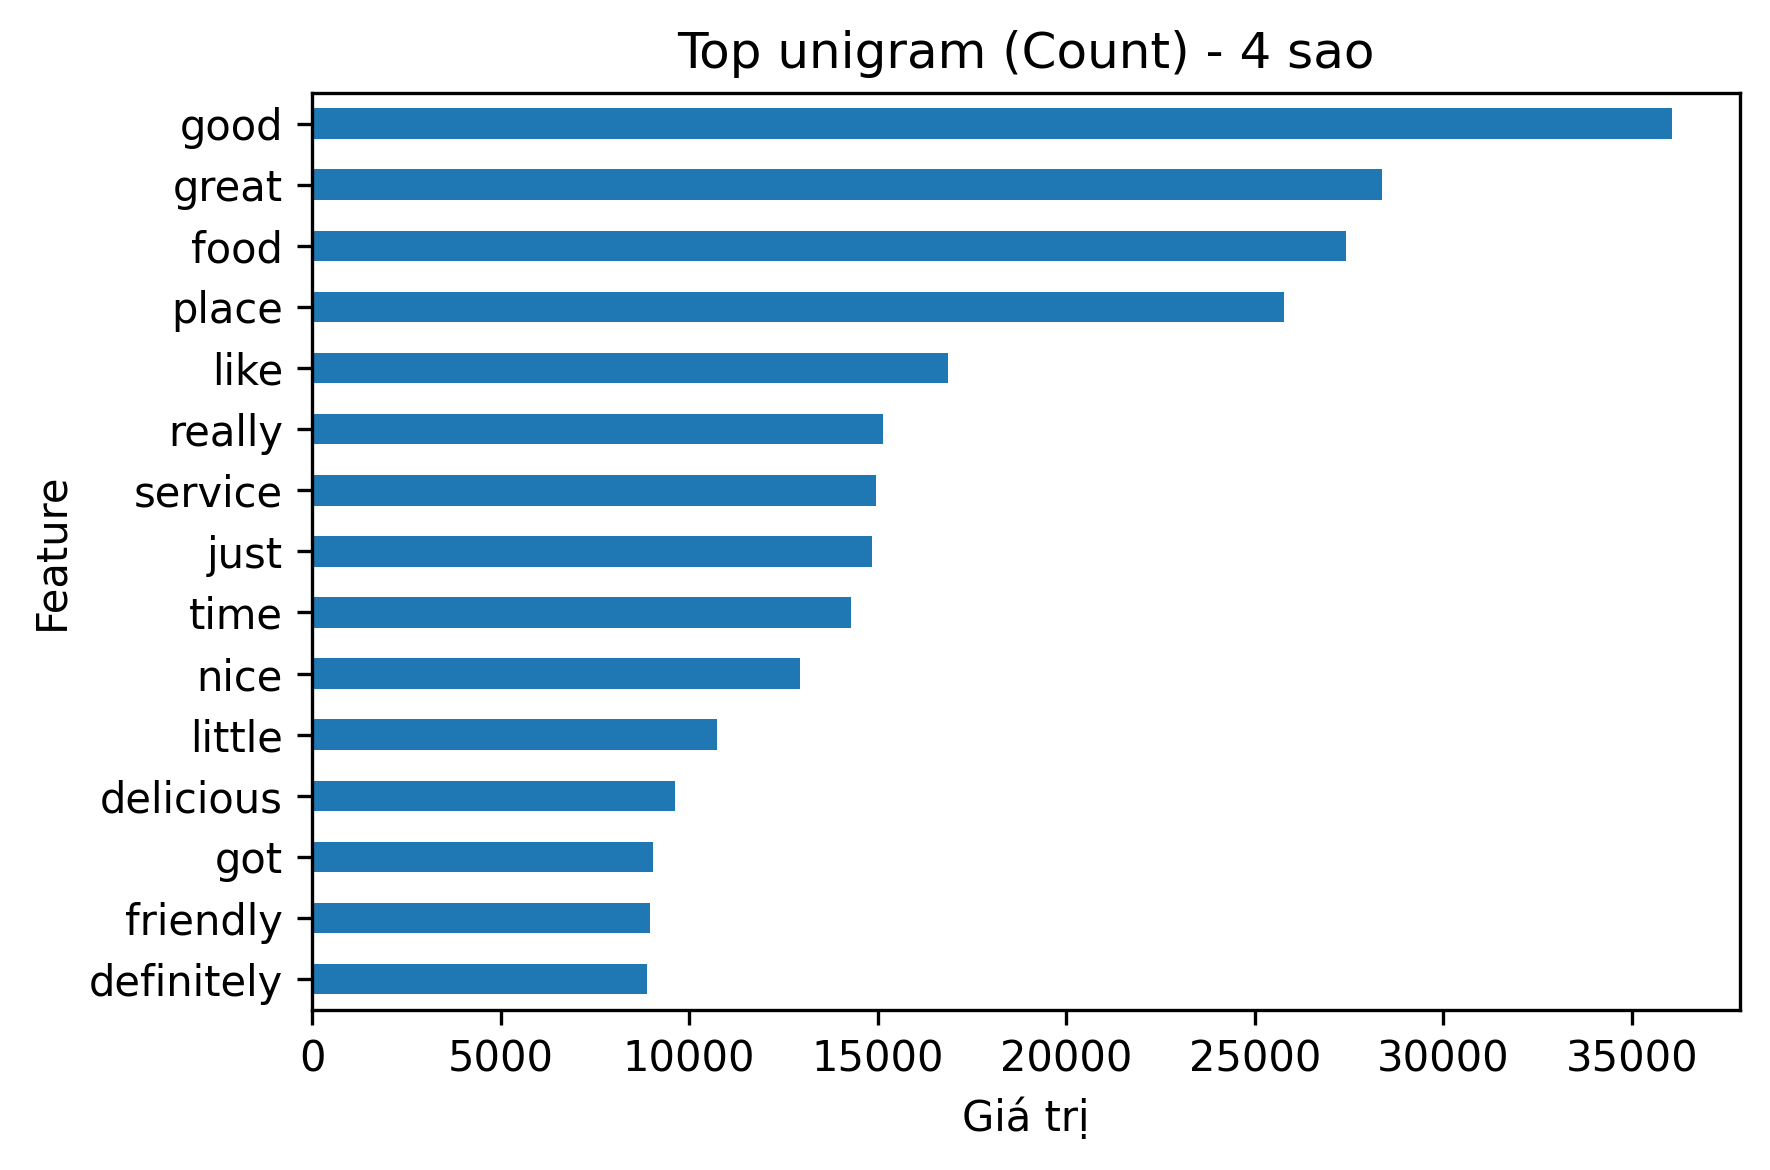

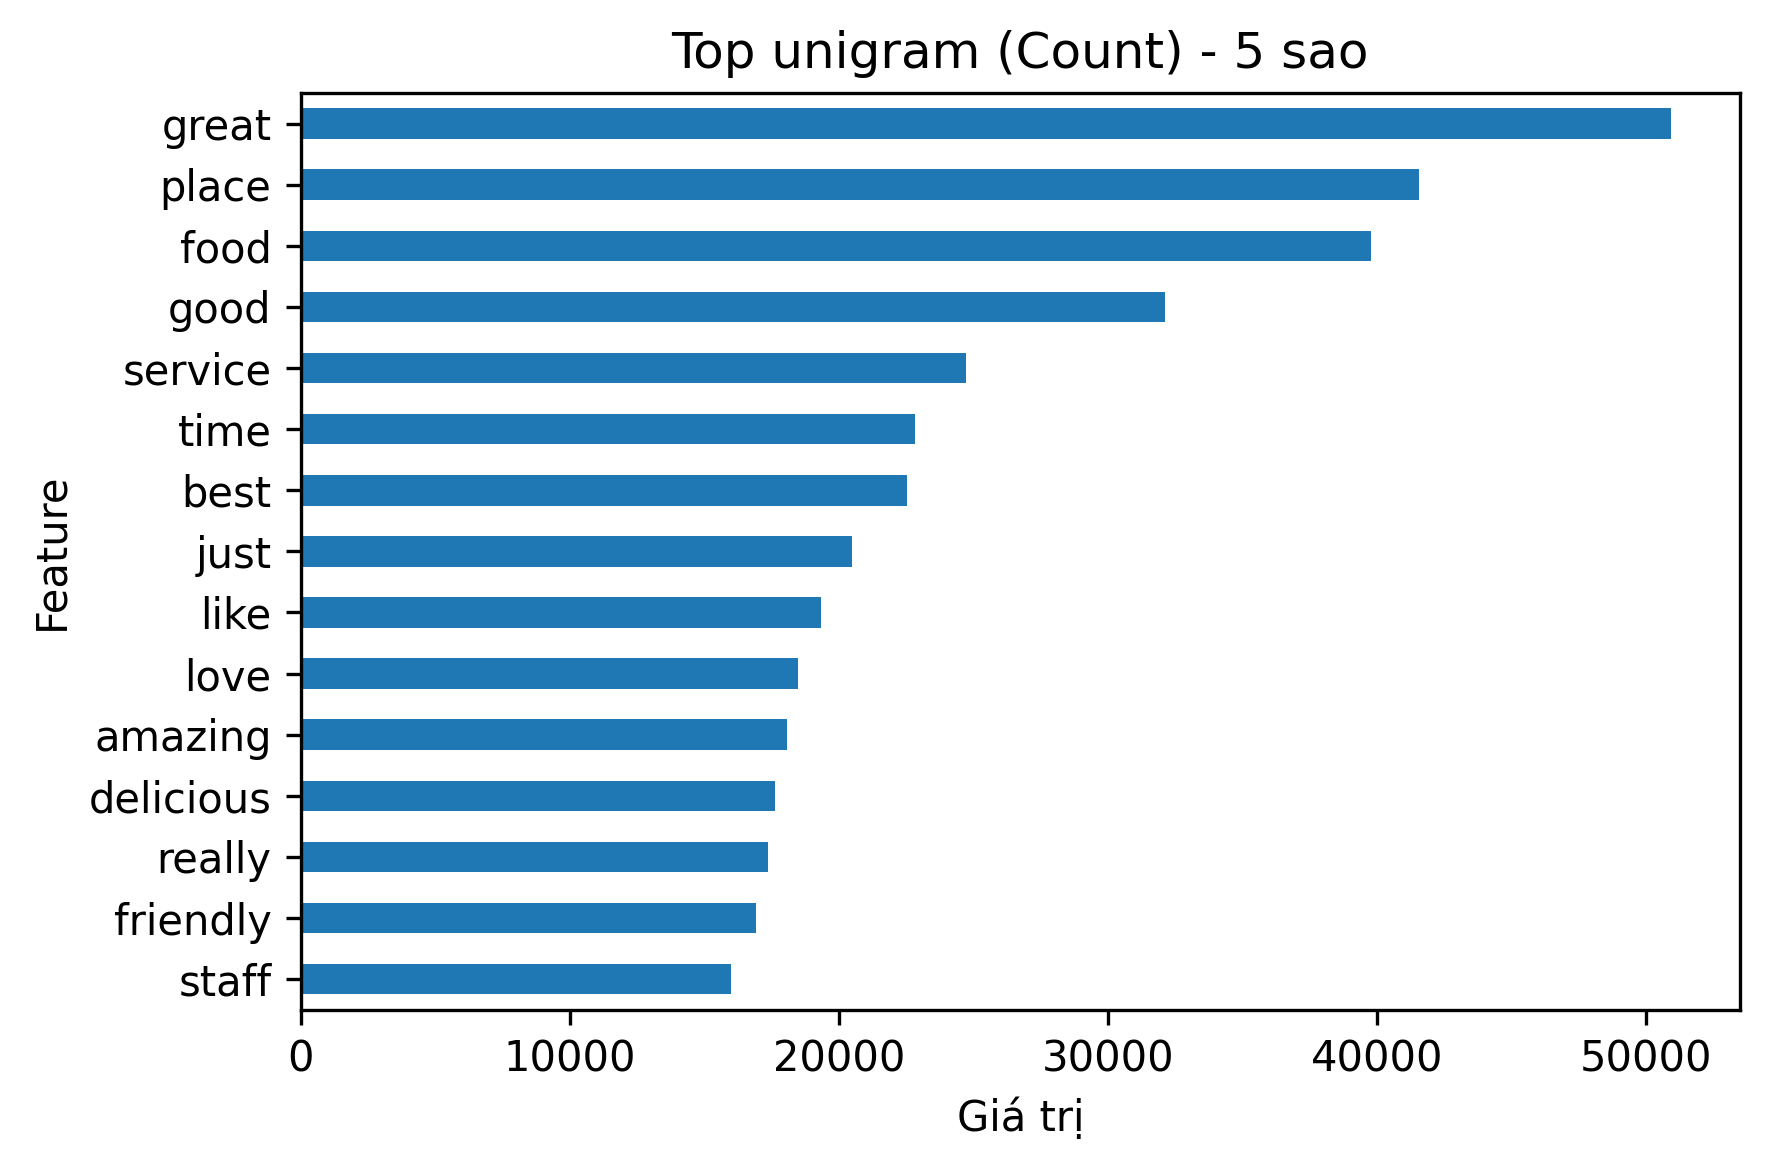

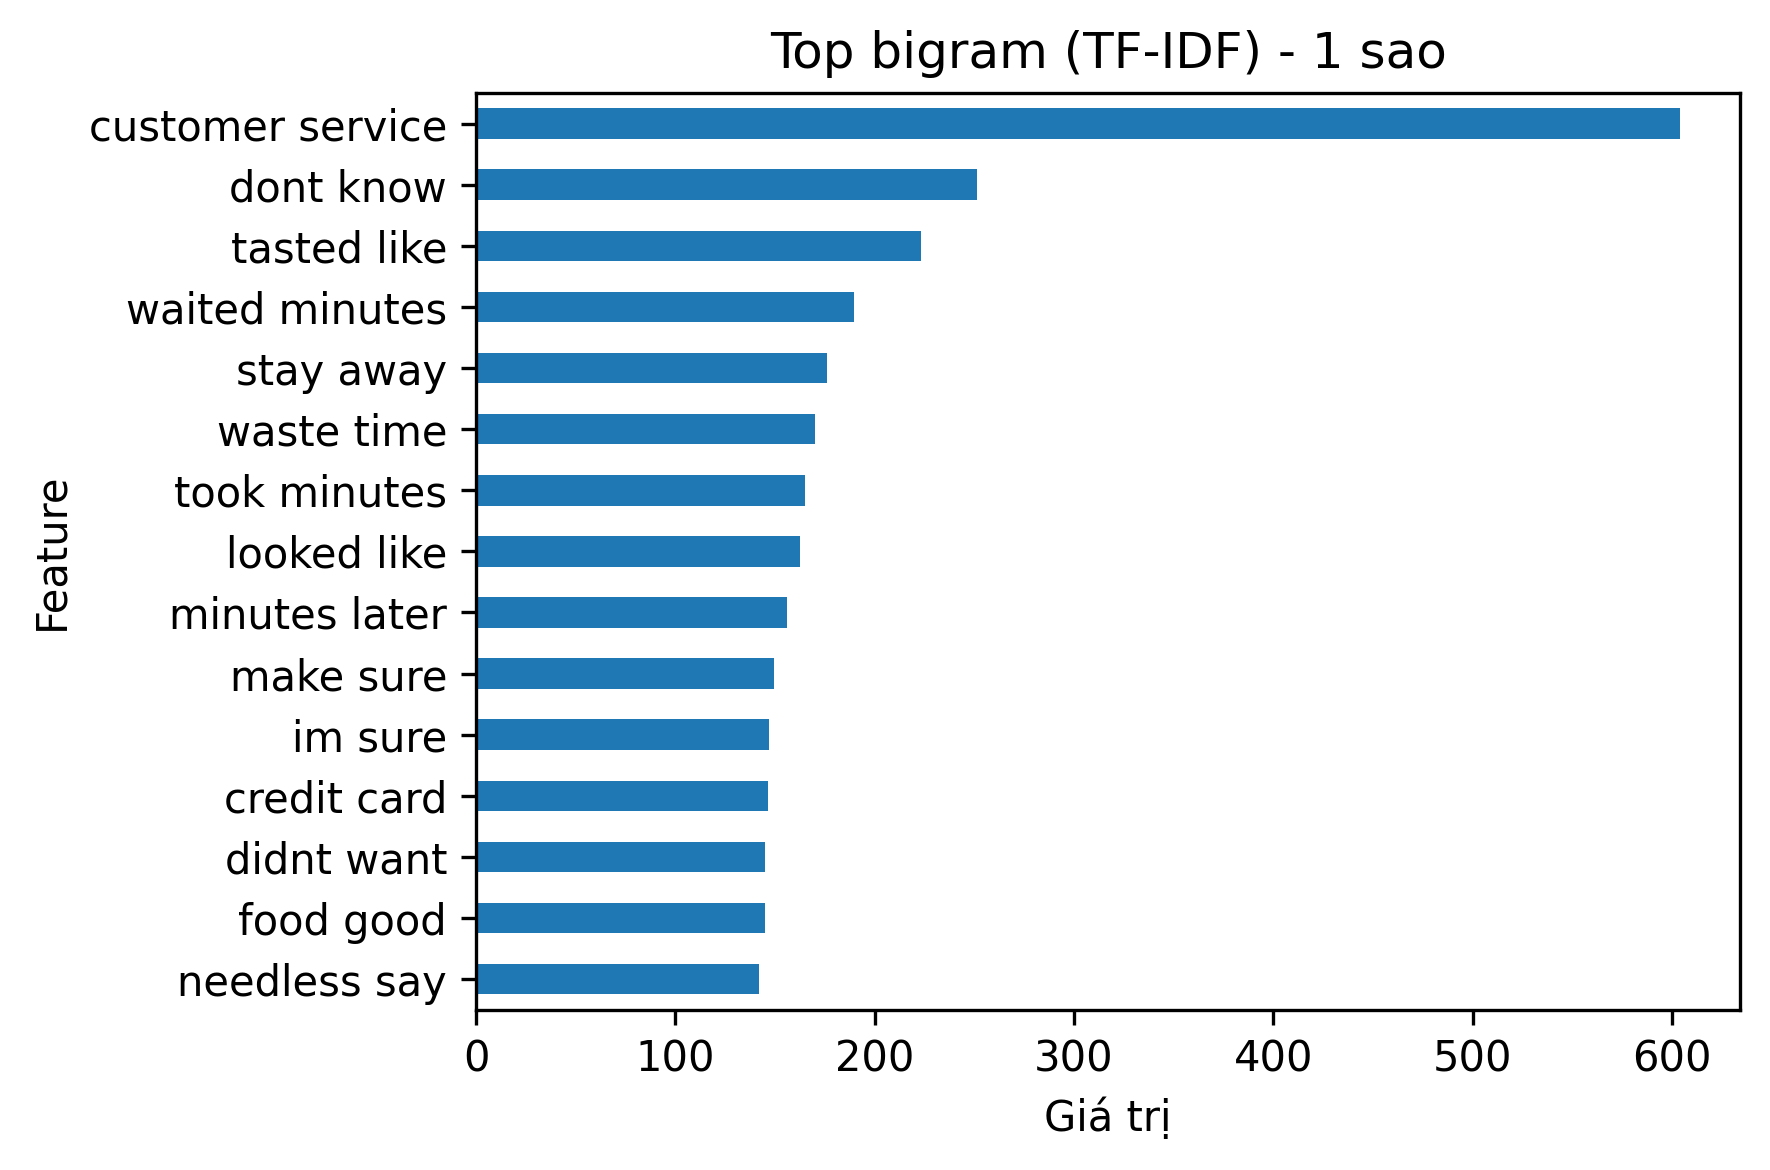

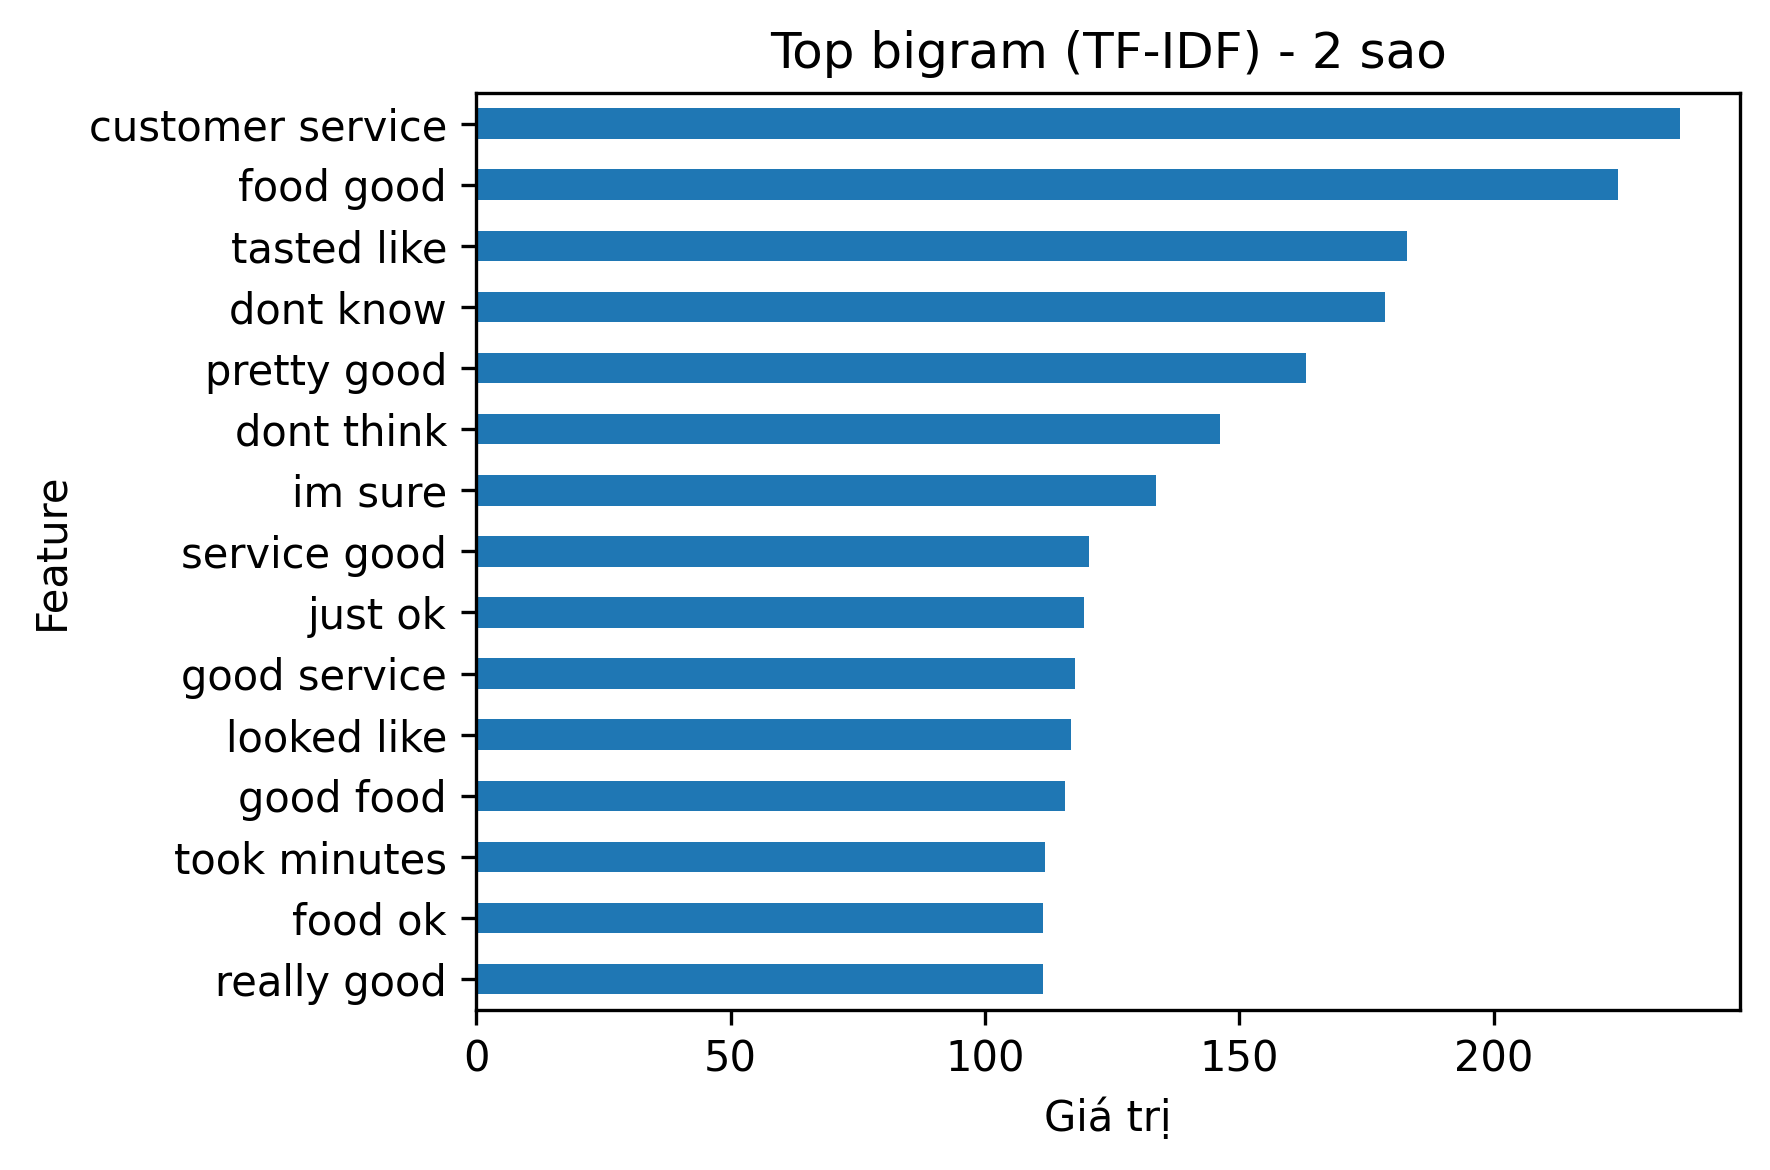

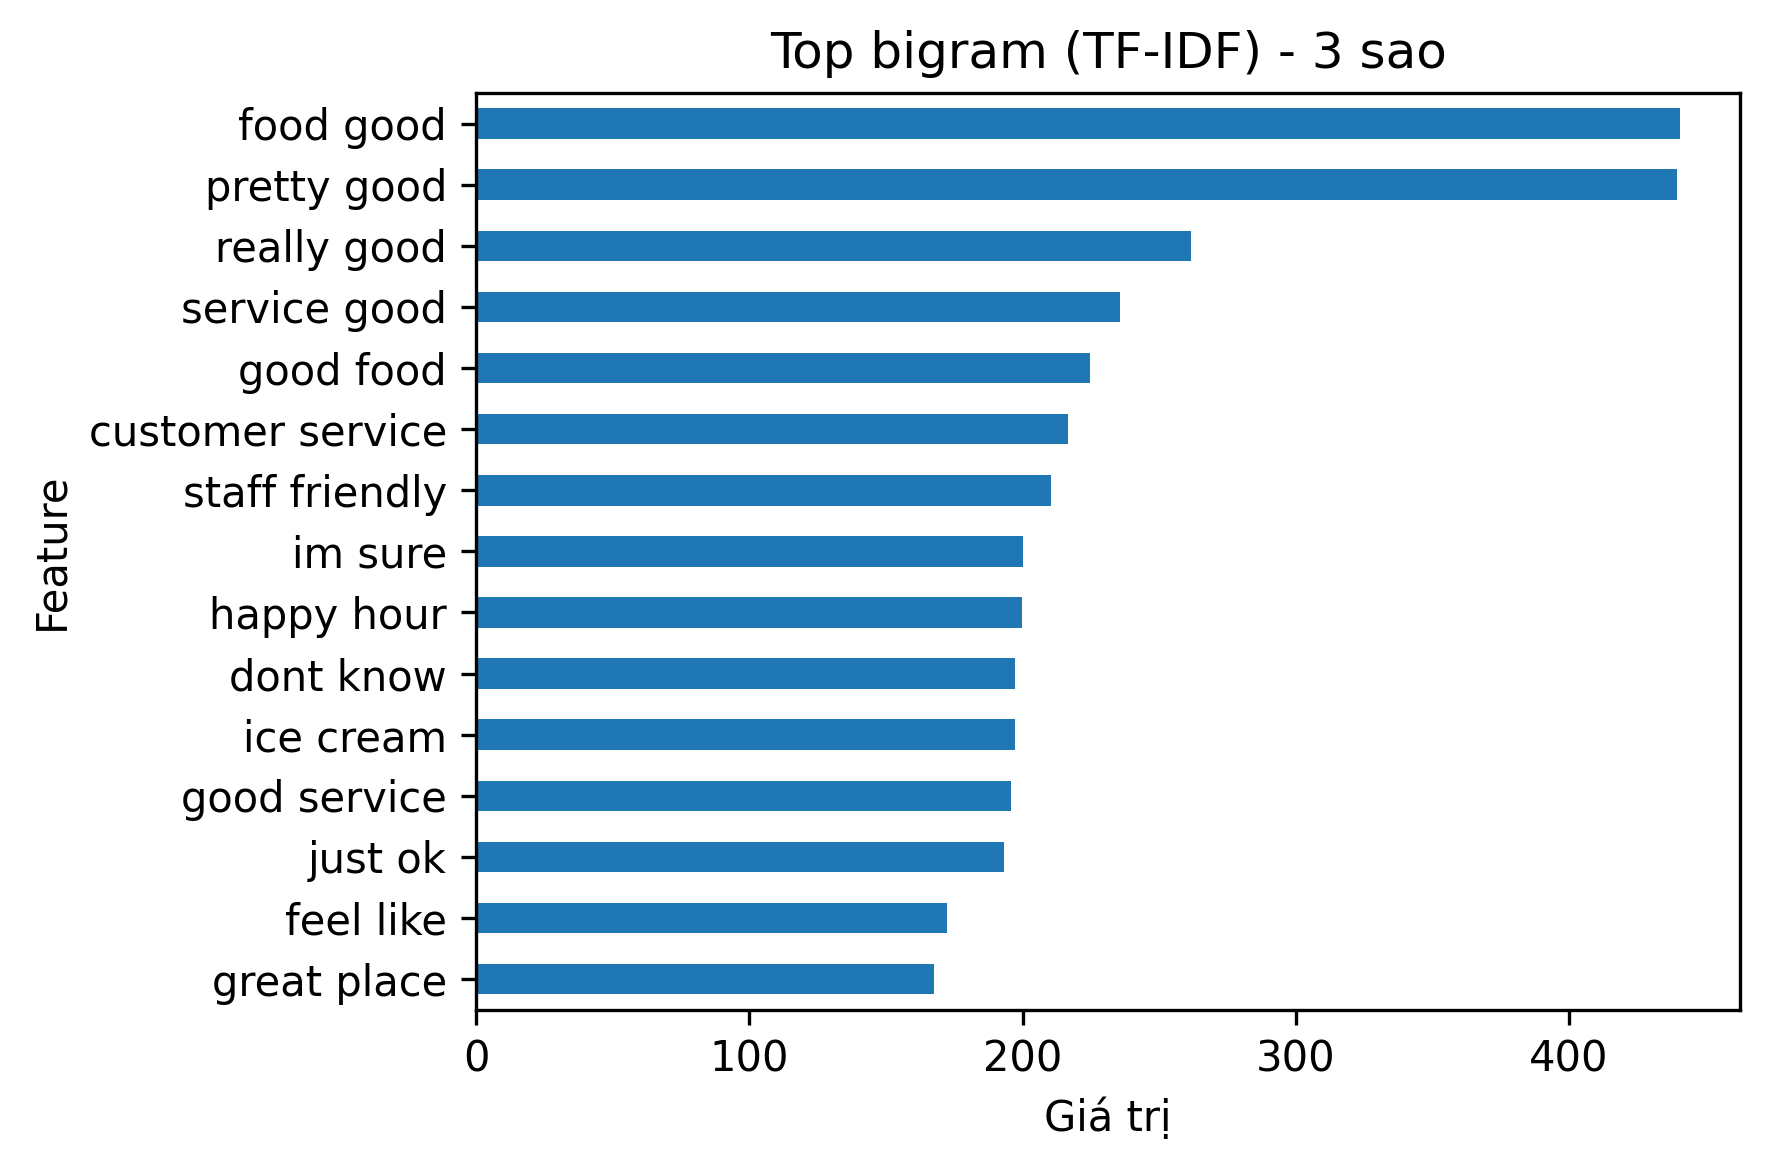

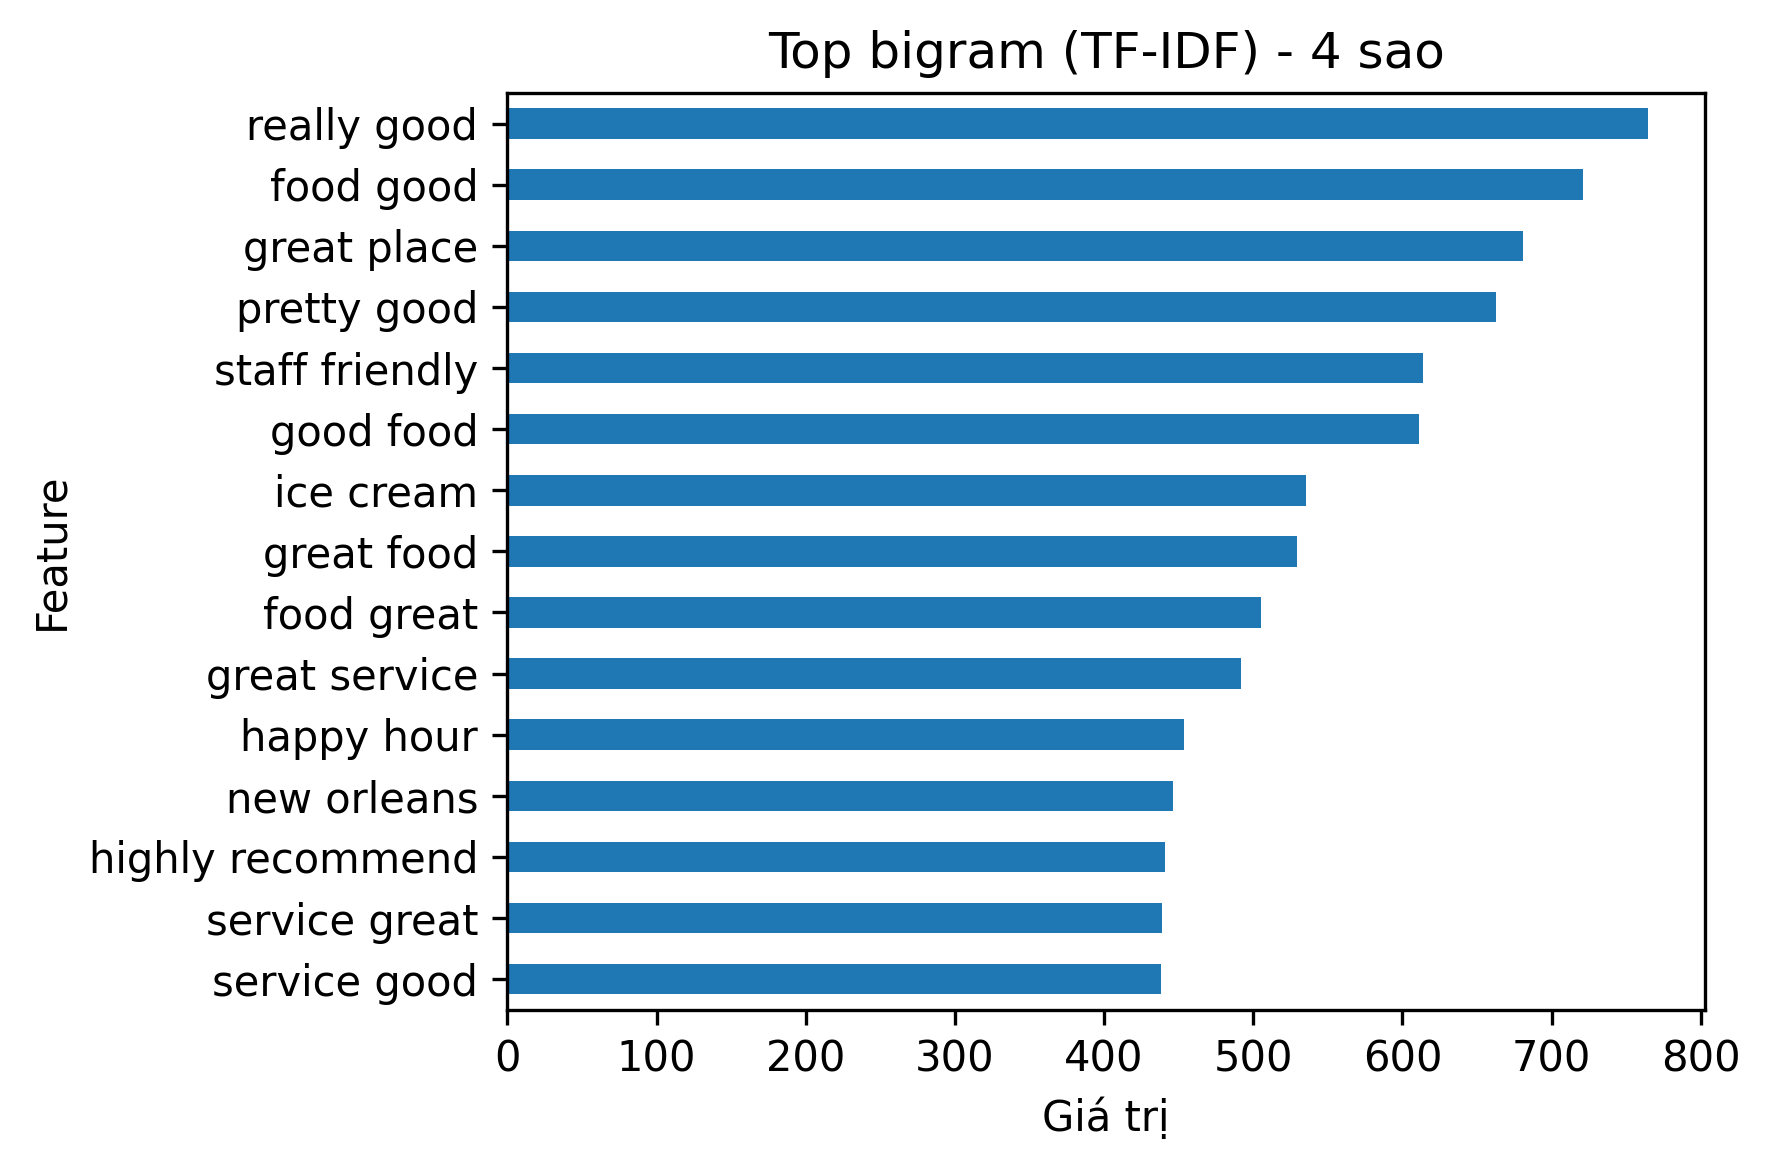

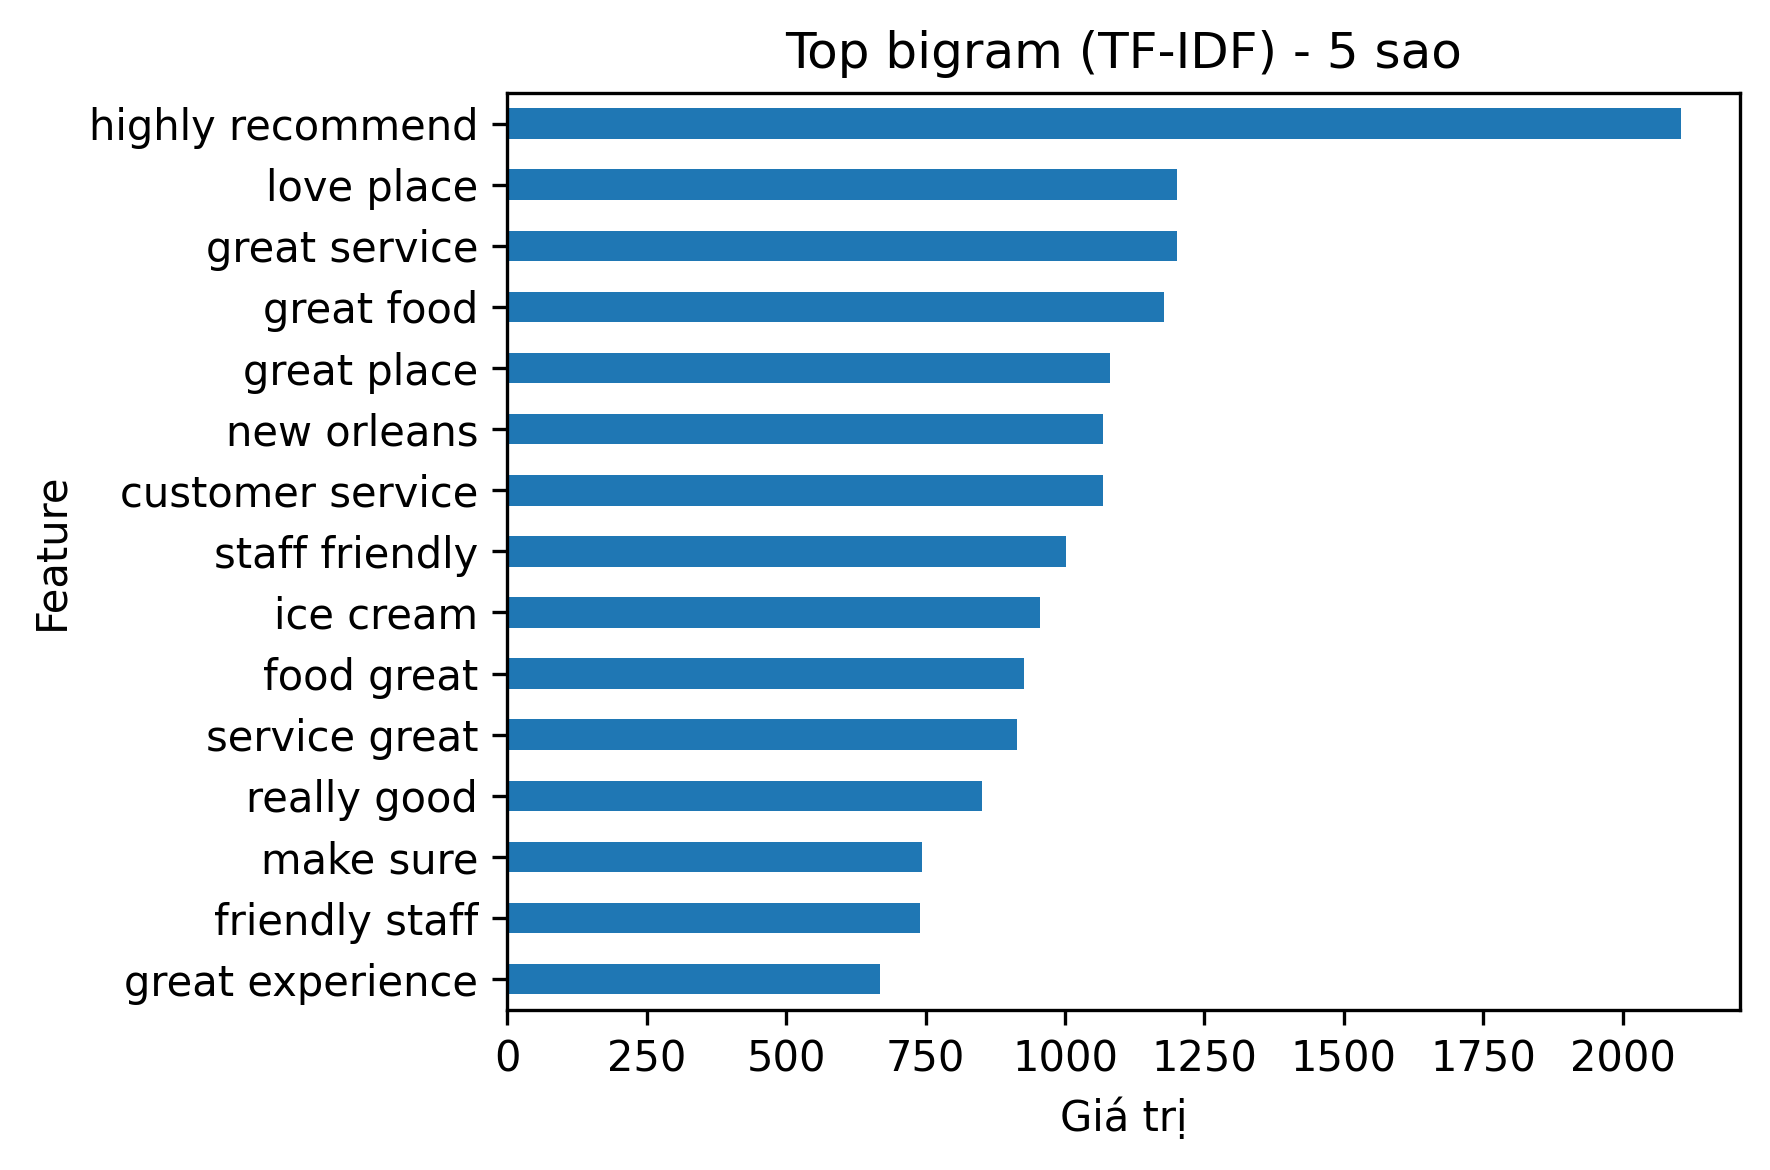

In [18]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


df = pd.read_csv("yelp_preprocessed.csv")
df = df[['stars', 'clean_text']].dropna()


def plot_top_features(texts, vectorizer, title, top_n=15):
    X = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()
    values = X.toarray().sum(axis=0)

    series = pd.Series(values, index=features).sort_values()

    plt.figure(figsize=(6,4), dpi=300)
    series.tail(top_n).plot(kind='barh')
    plt.title(title)
    plt.xlabel("Giá trị")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


for star in range(1, 6):
    texts = df[df['stars'] == star]['clean_text']

    count_vectorizer = CountVectorizer(
        stop_words='english',
        max_features=1000
    )

    plot_top_features(
        texts,
        count_vectorizer,
        title=f"Top unigram (Count) - {star} sao"
    )


for star in range(1, 6):
    texts = df[df['stars'] == star]['clean_text']

    tfidf_bigram = TfidfVectorizer(
        stop_words='english',
        ngram_range=(2, 2),
        max_features=1000
    )

    plot_top_features(
        texts,
        tfidf_bigram,
        title=f"Top bigram (TF-IDF) - {star} sao"
    )



